In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
df = pd.read_csv(r"C:\Users\Dell\Documents\car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Data Analysis

In [3]:
df.shape

(19237, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(18924, 18)

# Analysis Data

In [11]:
df["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [12]:
for col in df.columns:
    print(col,":",df[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


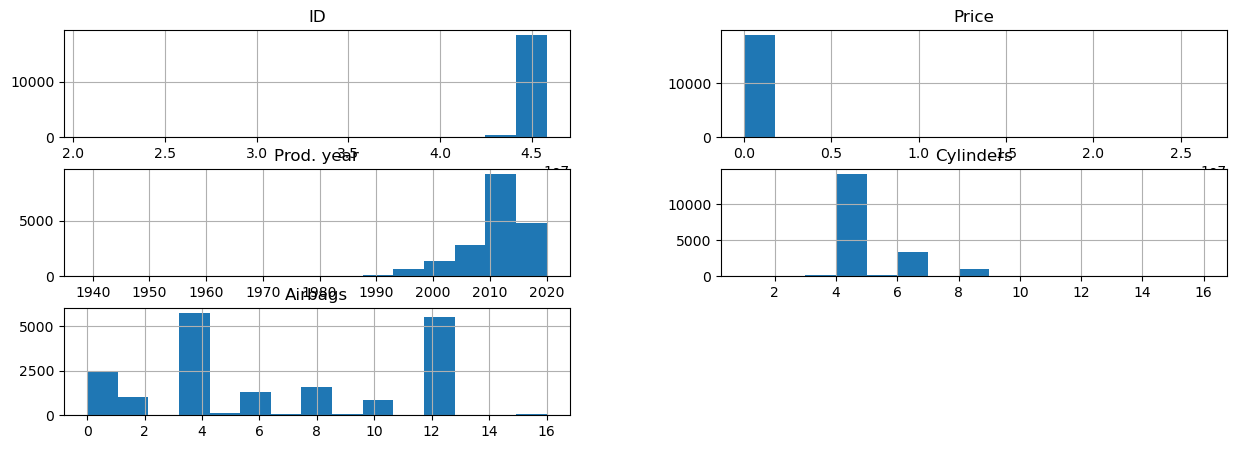

In [13]:
df.hist(bins=15,figsize=(15,5))
plt.show()

In [14]:
top_car = df['Manufacturer'].value_counts(ascending=False).head(10)
top_car

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

<Axes: >

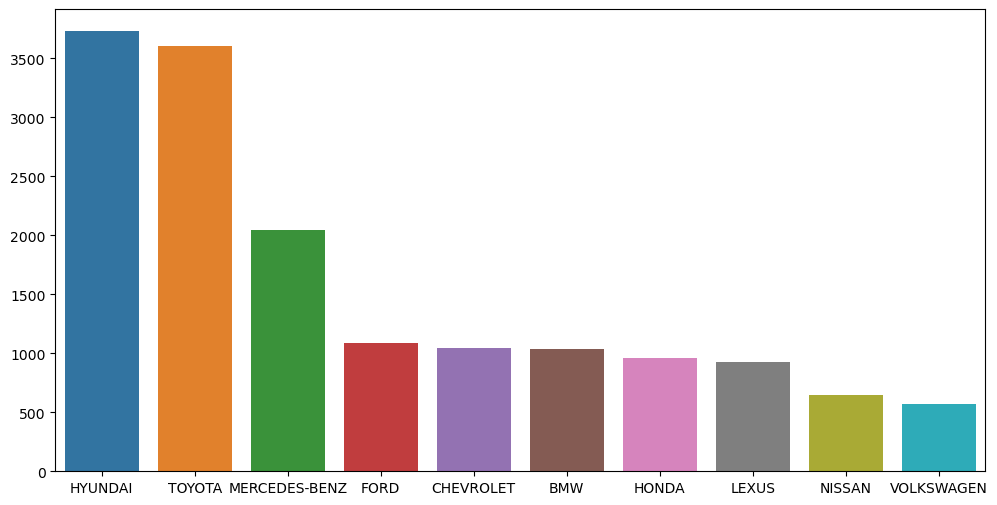

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=top_car.index,y=top_car.values)

In [16]:
corr=df.corr()
corr

C:\Users\Dell\AppData\Local\Temp\ipykernel_1944\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


<Axes: >

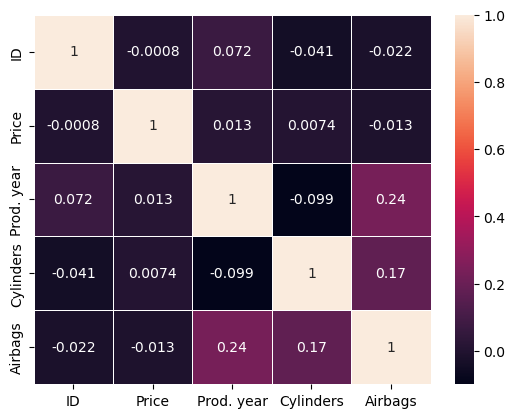

In [17]:
sns.heatmap(corr,annot=True,linewidths=.5)

In [18]:
obj = df.select_dtypes(include='object')
obj.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


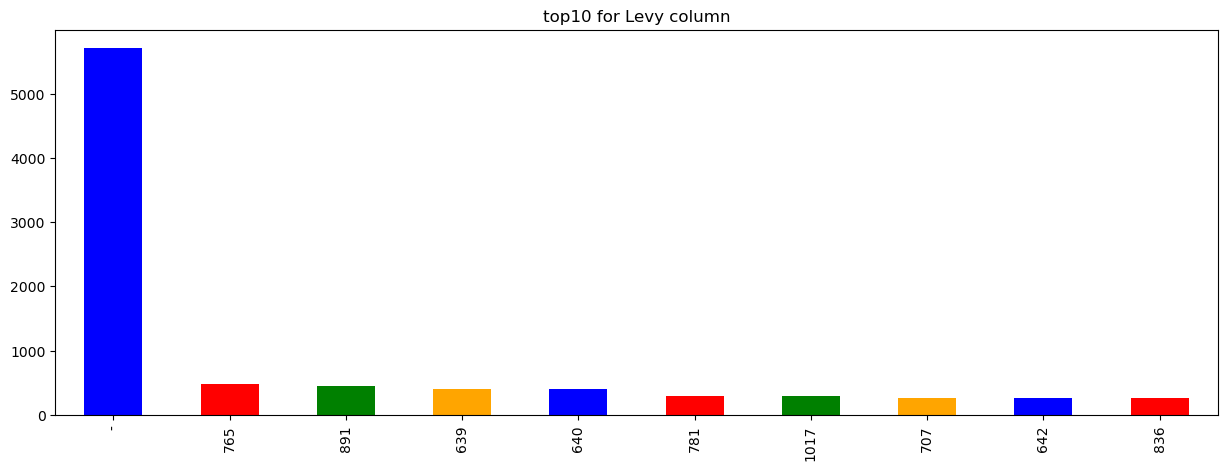

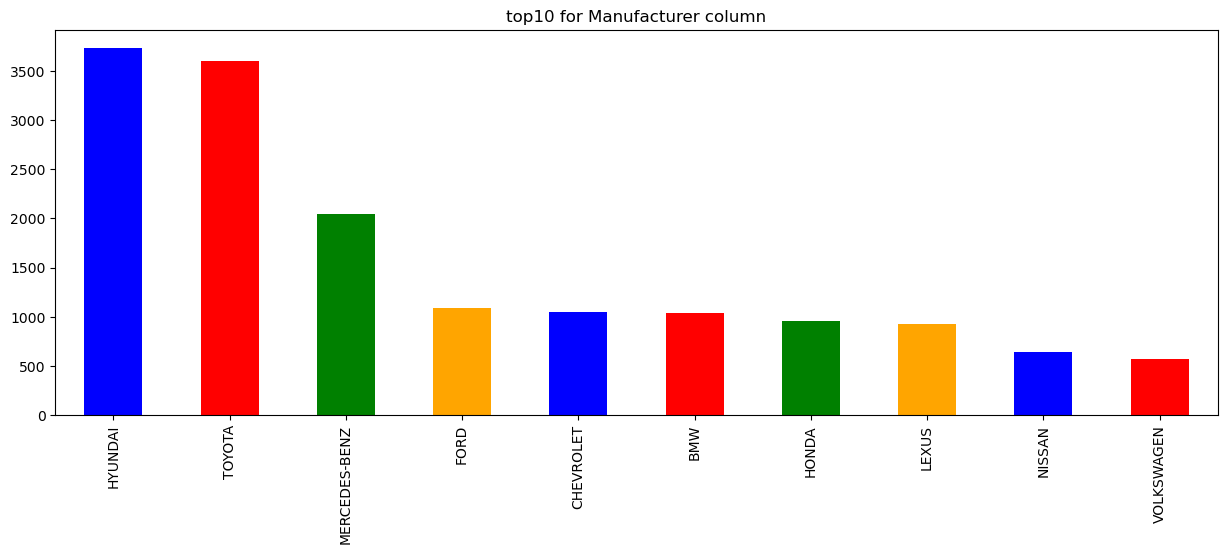

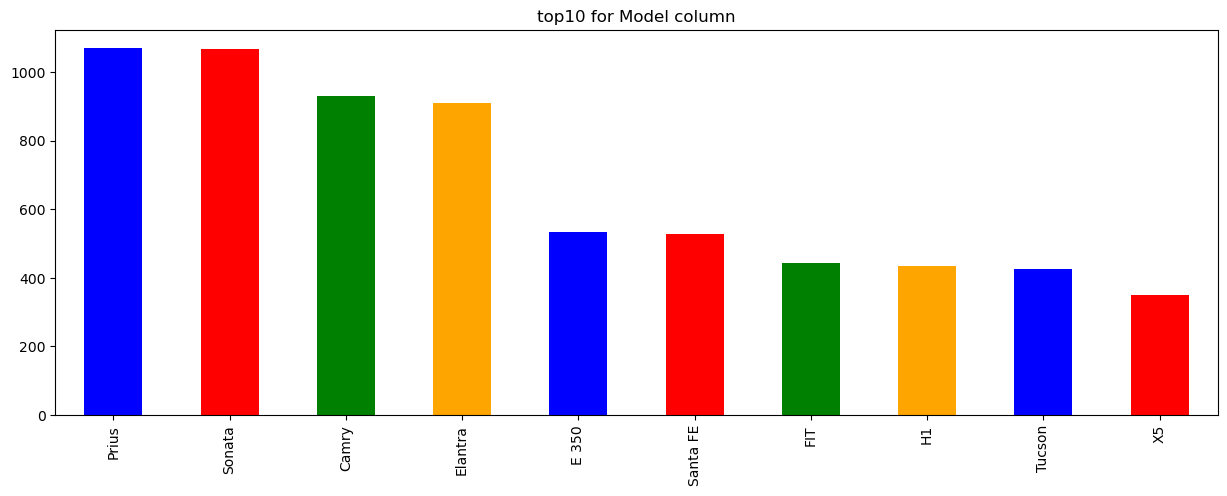

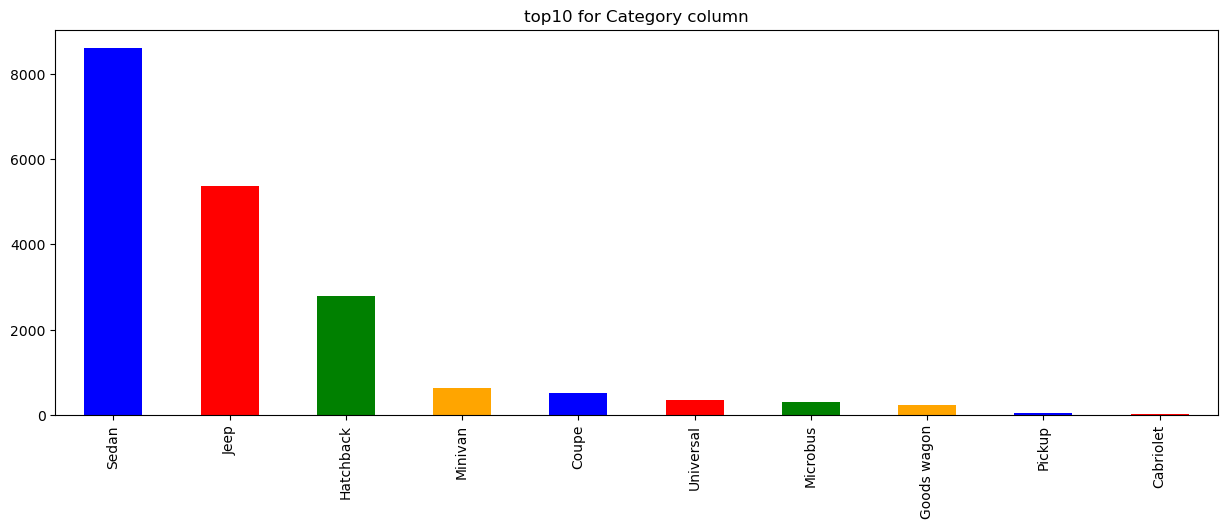

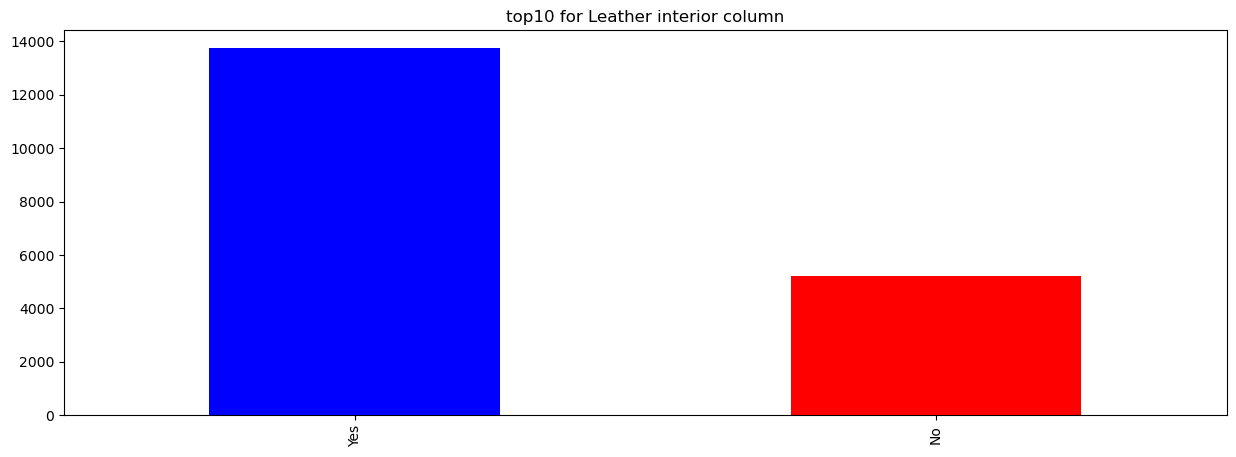

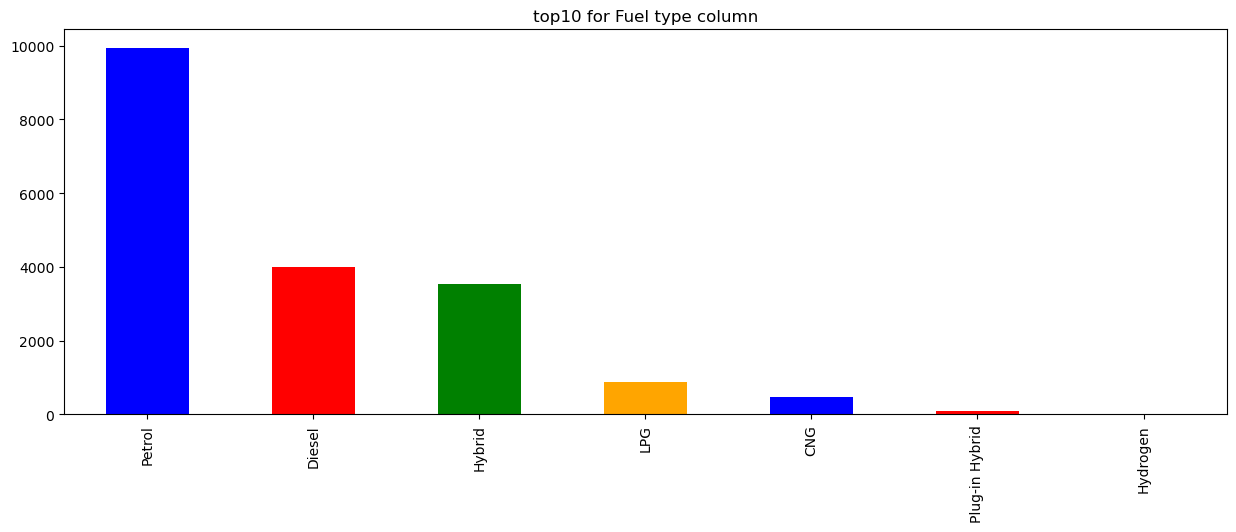

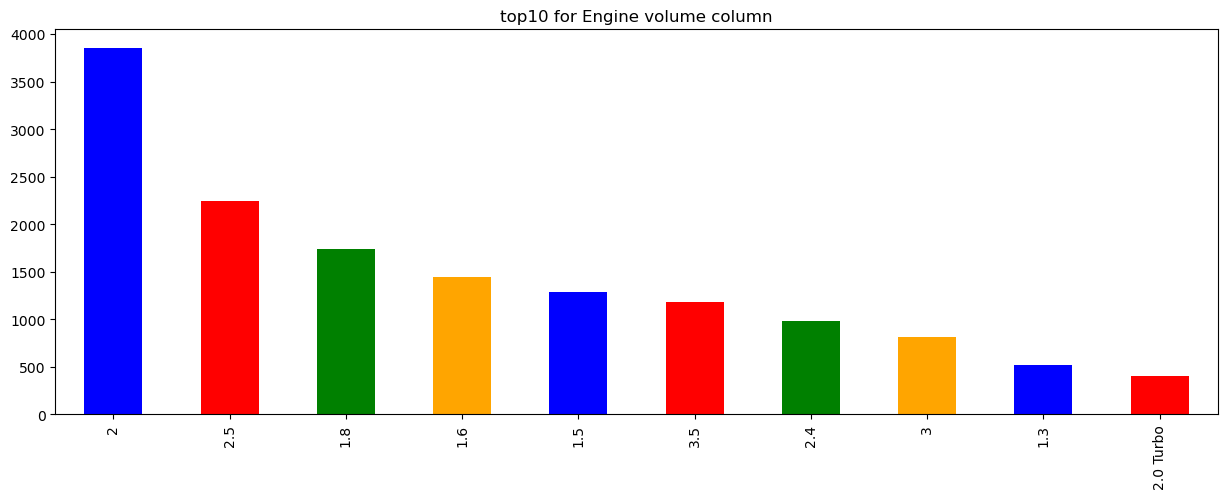

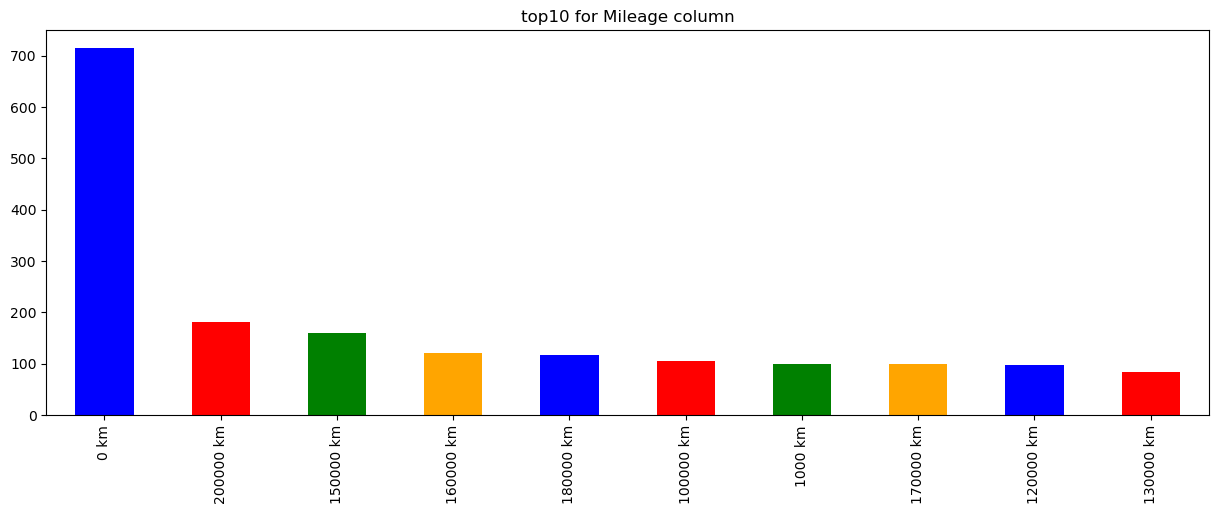

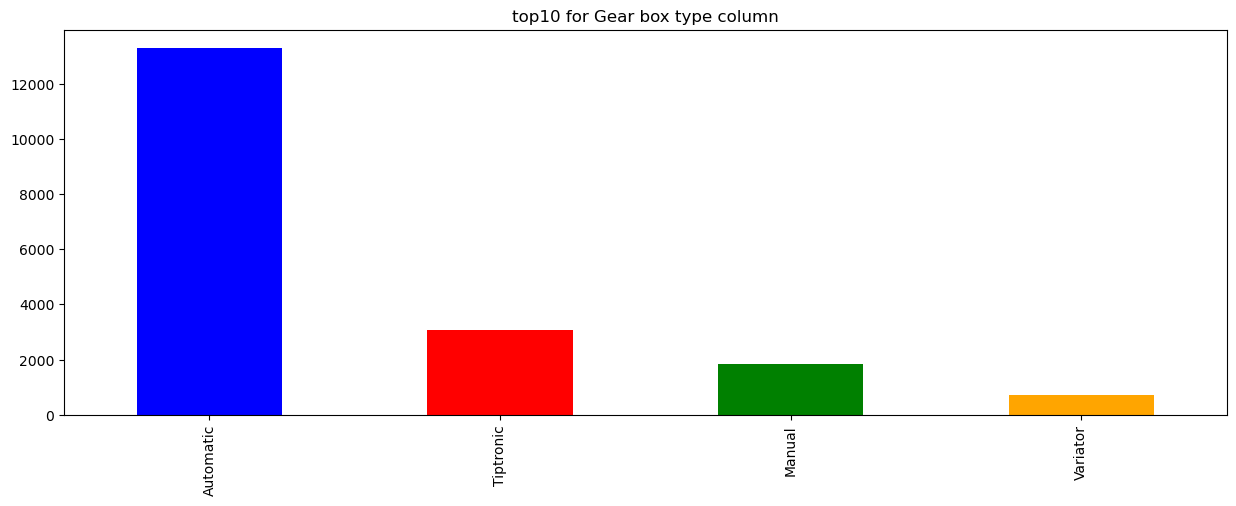

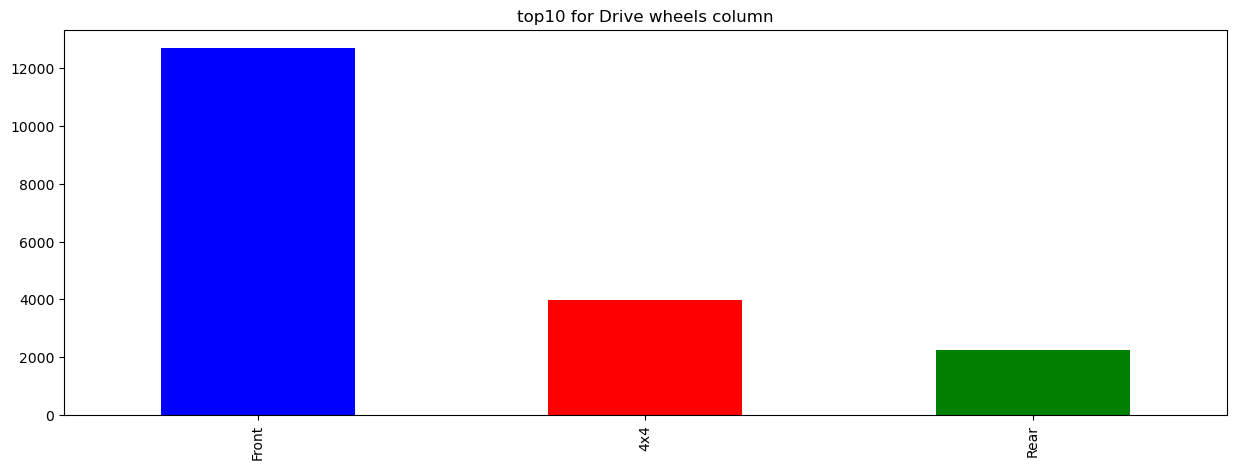

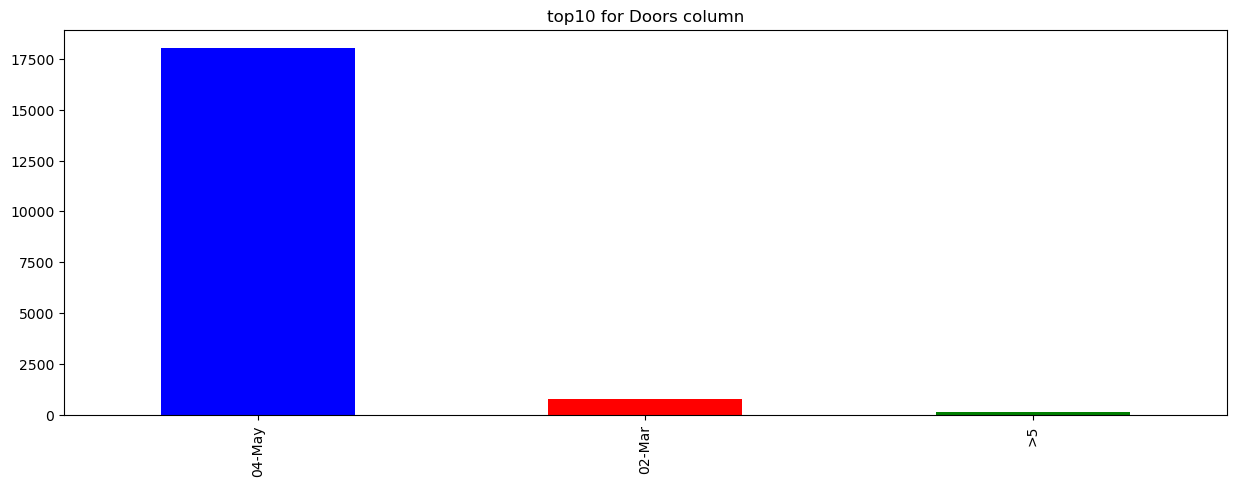

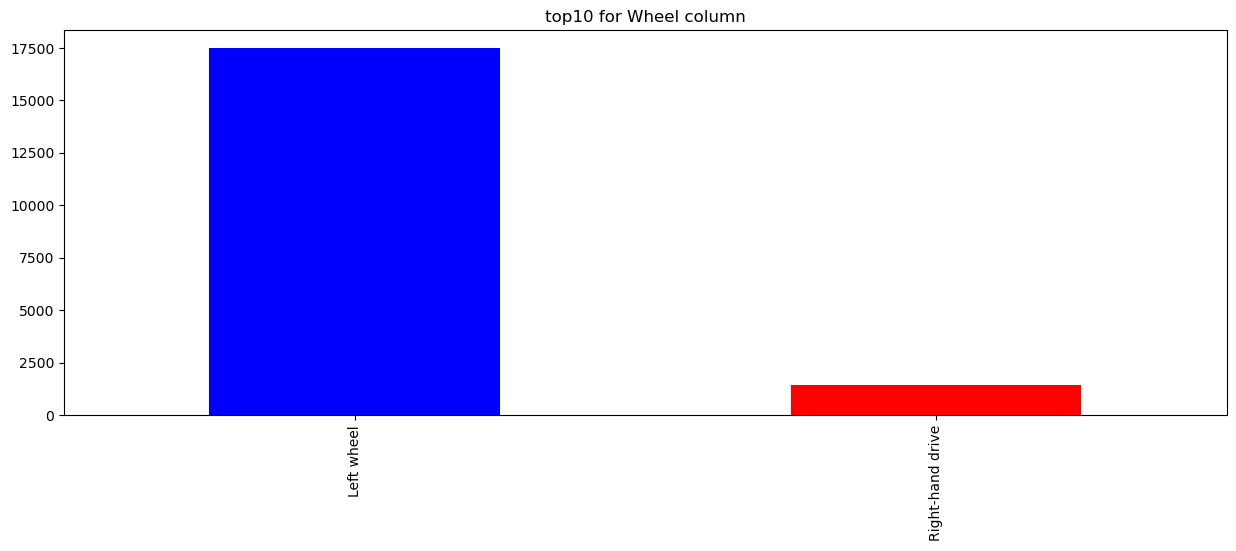

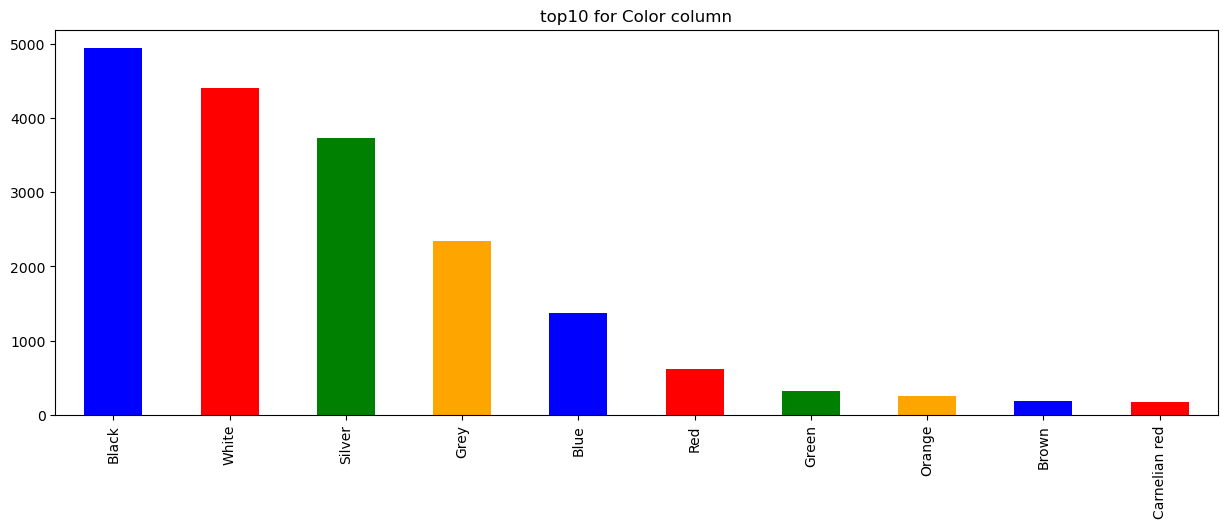

In [19]:
for col in obj:
    plt.figure(figsize=(15,5))
    top10 = df[col].value_counts().head(10)
    colors = ['blue','red','green','orange']
    top10.plot(kind='bar',color=colors)
    plt.title('top10 for'+' '+col+' '+'column')
    plt.show()

# Data Processing

In [20]:
df = df.drop(['ID','Doors'],axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

# Data Engineering

In [22]:
dtime = datetime.datetime.now()
dtime

datetime.datetime(2023, 9, 8, 11, 11, 0, 342744)

In [23]:
df["Age car"]= dtime.year-df["Prod. year"]

In [24]:
df["Age car"].head()

0    13
1    12
2    17
3    12
4     9
Name: Age car, dtype: int64

# Data Preprocissing

In [25]:
df=df.drop("Prod. year", axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age car
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9


In [26]:
df['Levy'].replace({'-':'0'},inplace=True)
df['Levy'] = df['Levy'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age car           18924 non-null  int64  
dtypes: float64(1), int32(1), int64(3), objec

In [28]:
df['Mileage'] = df['Mileage'].str.replace('km','')
df['Mileage'] = df['Mileage'].astype(int)
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age car
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9


In [29]:
df["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [30]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')
df['Engine volume'] = df['Engine volume'].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  int32  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age car           18924 non-null  int64  
dtypes: float64(2), int32(2), int64(3), objec

# Outlier preprocissing


In [36]:
data_num  = df.select_dtypes(exclude='object')

for col in data_num:
    q1 = df[col].quantile(0.25) #First Quarter
    q3 = df[col].quantile(0.75) #third Quarter
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    outlier = ((data_num[col]>high)|(data_num[col]<low)).sum()#outlier I collect every class in it 
    total = data_num[col].shape[0]# the number of rows
    print(f'the total outlier in {col} are: {outlier} --- {round(100*(outlier)/total,2)}%')
    if outlier>0:
        df = df.loc[(df[col]<=high) & (df[col]>=low)]

the total outlier in Price are: 1055 --- 5.57%
the total outlier in Levy are: 172 --- 0.91%
the total outlier in Engine volume are: 1358 --- 7.18%
the total outlier in Mileage are: 656 --- 3.47%
the total outlier in Cylinders are: 4765 --- 25.18%
the total outlier in Airbags are: 0 --- 0.0%
the total outlier in Age car are: 1777 --- 9.39%


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11799 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11799 non-null  int64  
 1   Levy              11799 non-null  int32  
 2   Manufacturer      11799 non-null  object 
 3   Model             11799 non-null  object 
 4   Category          11799 non-null  object 
 5   Leather interior  11799 non-null  object 
 6   Fuel type         11799 non-null  object 
 7   Engine volume     11799 non-null  float64
 8   Mileage           11799 non-null  int32  
 9   Cylinders         11799 non-null  float64
 10  Gear box type     11799 non-null  object 
 11  Drive wheels      11799 non-null  object 
 12  Wheel             11799 non-null  object 
 13  Color             11799 non-null  object 
 14  Airbags           11799 non-null  int64  
 15  Age car           11799 non-null  int64  
dtypes: float64(2), int32(2), int64(3), objec

# Transform categorical variables

In [38]:
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [39]:
lab_enc = LabelEncoder()
for col in obj.columns:
     obj[col]= lab_enc.fit_transform(obj[col])

In [41]:
obj

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
2,16,346,3,0,4,3,1,1,1
3,12,333,4,1,2,0,0,0,14
4,16,346,3,1,4,0,1,0,12
5,17,681,4,1,1,0,1,0,14
6,43,614,3,1,2,0,1,0,14
...,...,...,...,...,...,...,...,...,...
19230,43,614,3,1,2,0,1,0,12
19233,17,695,8,1,4,2,1,0,11
19234,17,767,4,1,1,0,1,0,7
19235,6,213,4,1,1,0,1,0,1


In [42]:
df = pd.concat([obj,num],axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11799 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      11799 non-null  int32  
 1   Model             11799 non-null  int32  
 2   Category          11799 non-null  int32  
 3   Leather interior  11799 non-null  int32  
 4   Fuel type         11799 non-null  int32  
 5   Gear box type     11799 non-null  int32  
 6   Drive wheels      11799 non-null  int32  
 7   Wheel             11799 non-null  int32  
 8   Color             11799 non-null  int32  
 9   Price             11799 non-null  int64  
 10  Levy              11799 non-null  int32  
 11  Engine volume     11799 non-null  float64
 12  Mileage           11799 non-null  int32  
 13  Cylinders         11799 non-null  float64
 14  Airbags           11799 non-null  int64  
 15  Age car           11799 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memor

# Modeling

In [84]:
X= df.drop("Price", axis=1)
y = df['Price']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [86]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
rmse

9956.780870087978

In [87]:
score= lr.score(x_test,y_test)
score

0.2476071872221003

# Polynomial Features and Standanderization

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
X.shape

(11799, 136)

In [89]:
s=StandardScaler()
X=s.fit_transform(X)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [91]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
rmse

7694.150328945561

In [92]:
score= lr.score(x_test,y_test)
score

0.5507086323009895

Here we can clearly observe the improvement by using above two methodes

# Regularization and Cross-Validation

In [100]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

ridgeCV = RidgeCV(cv=4).fit(x_train, y_train)

ridgeCV_mse = mean_squared_error(y_test, ridgeCV.predict(x_test))
ridgeCV_rmse = np.sqrt(ridgeCV_mse)
print(ridgeCV.alpha_, ridgeCV_rmse)


1.0 7694.244101395901


In [101]:
score= ridgeCV.score(x_test,y_test)
score

0.5506976807579599

In [103]:
lassoCV = LassoCV(max_iter=5000,cv=3).fit(x_train, y_train)

lassoCV_mse = mean_squared_error(y_test, lassoCV.predict(x_test))
lassoCV_rmse = np.sqrt(lassoCV_mse)

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

5.583000037212642 7696.740132635605


In [108]:
score=lassoCV.score(x_test,y_test)
score

0.5504061239749094

In [105]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(l1_ratio=l1_ratios,max_iter=10000).fit(x_train, y_train)
elasticNetCV_mse = mean_squared_error(y_test, elasticNetCV.predict(x_test))
elasticNetCV_rmse = np.sqrt(elasticNetCV_mse)

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

3.5497754283440757 0.9 9151.388842134926


In [109]:
score=elasticNetCV.score(x_test,y_test)
score

0.3644045821297004

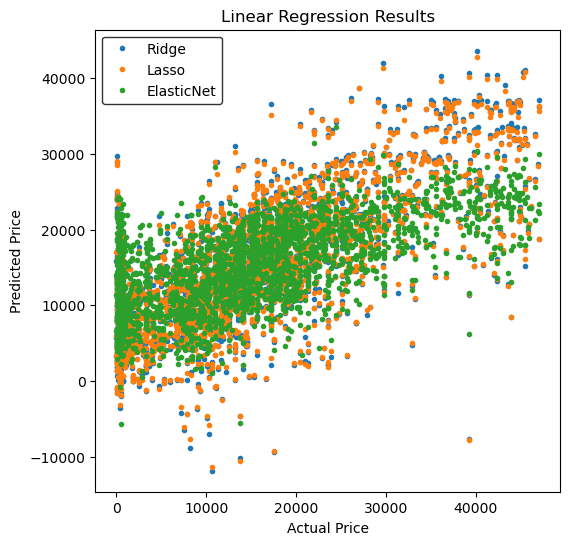

In [106]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(x_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

# Final Note

Rigid is the good option to reduce the error